In [18]:
import pandas as pd
import numpy as np
import keras 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers as kl
from keras.layers import Dense as kld
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,6 

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df.set_index(df['Month'], inplace= True)

In [6]:
df.head()

,Month,#Passengers
Month,,
1949-01,1949-01,112
1949-02,1949-02,118
1949-03,1949-03,132
1949-04,1949-04,129
1949-05,1949-05,121


In [7]:
df.drop(columns= ['Month'], inplace = True)

In [8]:
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


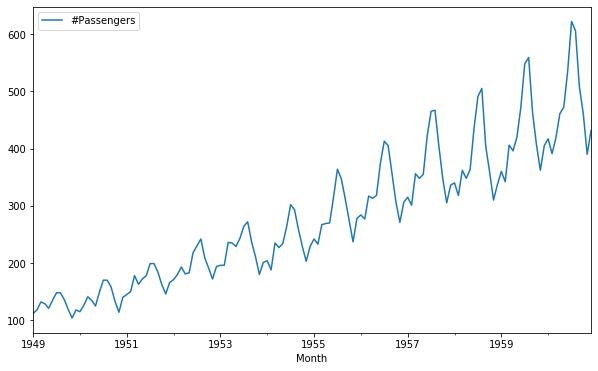

In [19]:
df.plot()

In [13]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Checking Stationary of the data

#### Rolling Statistics

In [32]:
rolMean = df.rolling(window = 12).mean()
rolStd = df.rolling(window = 12).std()
print(rolMean, rolStd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


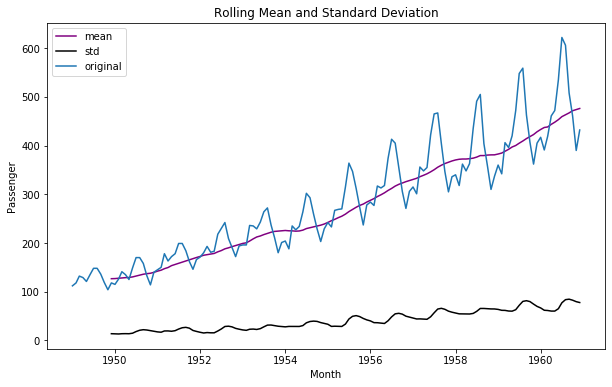

In [37]:
plt.plot(rolMean.index, rolMean['#Passengers'], c= 'purple', label= 'mean')
plt.plot(rolStd.index, rolStd['#Passengers'], c= 'k', label = 'std')
plt.plot(df.index, df['#Passengers'], label = 'original')
plt.legend(loc= 'best')
plt.xlabel('Month')
plt.ylabel('Passenger')
plt.title('Rolling Mean and Standard Deviation')
plt.show()

##### as they mean and std are not constant they are not stationary

#### Dicky Fuller Test

In [39]:
from statsmodels.tsa.stattools import adfuller

In [41]:
dftest = adfuller(df['#Passengers'], autolag= 'aic')
dfoutput = pd.Series(dftest[:4], index = ['Test Statistics', 
                                          'p-value', '#Lags used', 'Number of observation used'])

In [43]:
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
print(dfoutput)

Test Statistics                 0.815369
p-value                         0.991880
#Lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


##### as p-value is large we can say it is not stationary

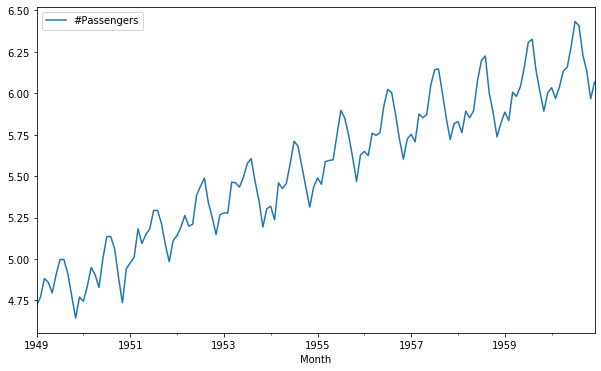

In [45]:
log_scale_df = np.log(df)
log_scale_df.plot()

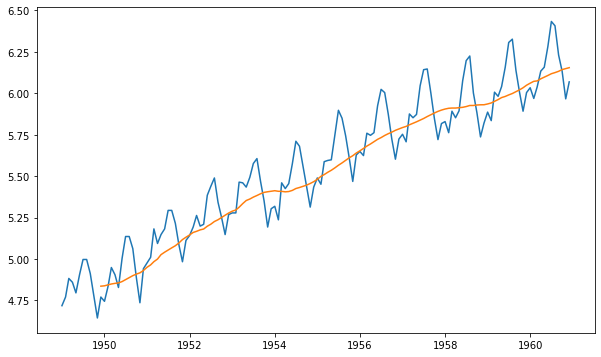

In [48]:
movingAverage_log_scale_df = log_scale_df.rolling(window = 12).mean()
movingStd_log_scale_df = log_scale_df.rolling(window = 12).std()
plt.plot(log_scale_df)
plt.plot(movingAverage_log_scale_df)

In [50]:
movingAverageMinusLogScale = movingAverage_log_scale_df - log_scale_df
movingAverageMinusLogScale.isna().sum()

#Passengers    11
dtype: int64

In [51]:
movingAverageMinusLogScale.dropna(inplace= True)
movingAverageMinusLogScale.head()

,#Passengers
Month,
1949-12-01,0.065494
1950-01-01,0.093449
1950-02-01,0.007566
1950-03-01,-0.099416
1950-04-01,-0.052142


In [71]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window = 12).mean()
    movingStd = timeseries.rolling(window = 12).std()
    
    # plotting 
    plt.plot(timeseries, c= 'blue', label= 'original')
    plt.plot(movingAverage, c= 'purple', label = 'movingAverage')
    plt.plot(movingStd,c='k', label = 'movingStd')
    plt.legend(loc= 'best')
    plt.xlabel('Month')
    plt.ylabel('Passenger')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    
    dftest = adfuller(timeseries, autolag= 'aic')
    dfoutput = pd.Series(dftest[:4], index = ['Test Statistics', 
                                              'p-value', '#Lags used', 'Number of observation used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

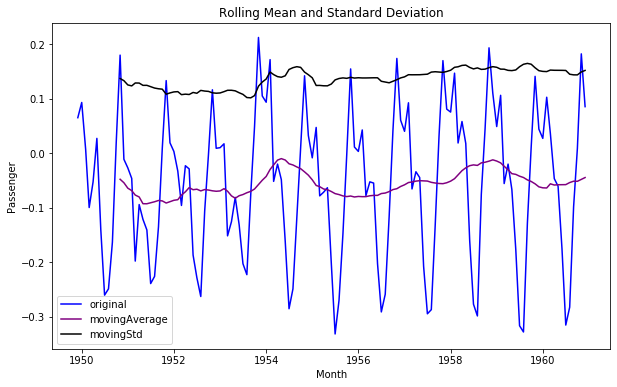

Test Statistics                -3.162908
p-value                         0.022235
#Lags used                     13.000000
Number of observation used    119.000000
Critical value (1%)            -3.486535
Critical value (5%)            -2.886151
Critical value (10%)           -2.579896
dtype: float64


In [72]:
test_stationary(movingAverageMinusLogScale)

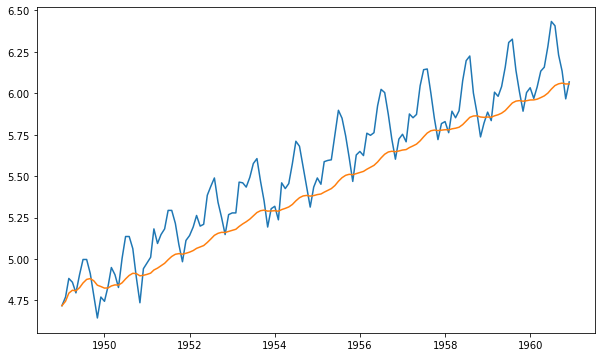

In [57]:
exponentialDecayWeightedAvergae = log_scale_df.ewm(halflife= 12, min_periods= 0, adjust= True).mean()
plt.plot(log_scale_df)
plt.plot(exponentialDecayWeightedAvergae)

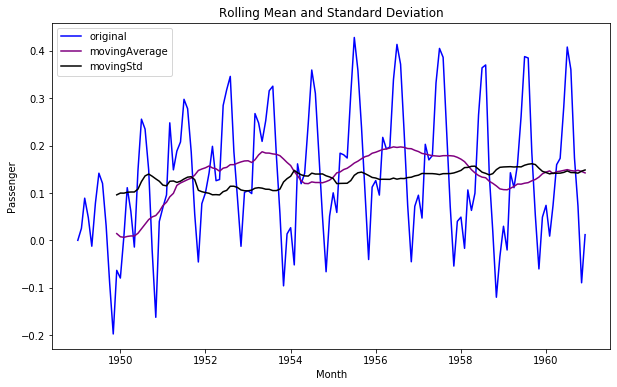

Test Statistics                -3.601262
p-value                         0.005737
#Lags used                     13.000000
Number of observation used    130.000000
Critical value (1%)            -3.481682
Critical value (5%)            -2.884042
Critical value (10%)           -2.578770
dtype: float64


In [58]:
logScaleMinusExponentialAverageDecay = log_scale_df - exponentialDecayWeightedAvergae
test_stationary(logScaleMinusExponentialAverageDecay)

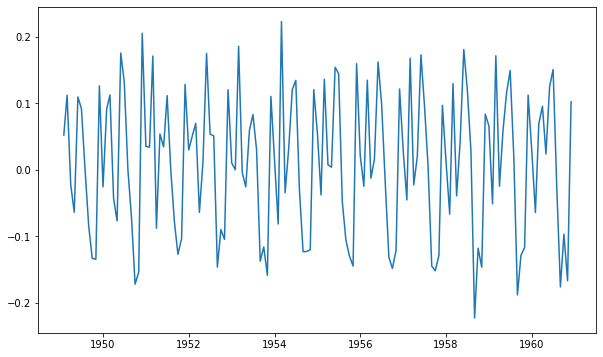

In [59]:
logSclaeDiffShift = log_scale_df - log_scale_df.shift()
plt.plot(logSclaeDiffShift)

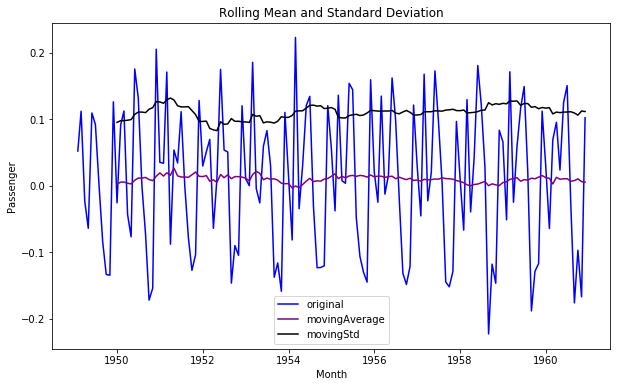

Test Statistics                -2.717131
p-value                         0.071121
#Lags used                     14.000000
Number of observation used    128.000000
Critical value (1%)            -3.482501
Critical value (5%)            -2.884398
Critical value (10%)           -2.578960
dtype: float64


In [61]:
logSclaeDiffShift.dropna(inplace= True)
test_stationary(logSclaeDiffShift)

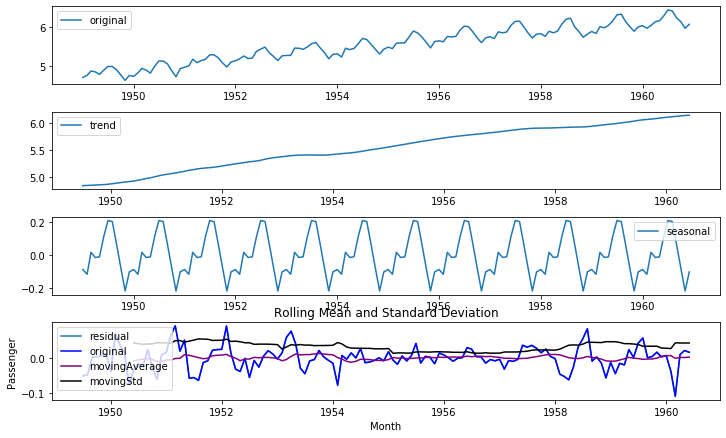

Test Statistics              -6.332387e+00
p-value                       2.885059e-08
#Lags used                    9.000000e+00
Number of observation used    1.220000e+02
Critical value (1%)          -3.485122e+00
Critical value (5%)          -2.885538e+00
Critical value (10%)         -2.579569e+00
dtype: float64


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(log_scale_df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(log_scale_df, label= 'original')
plt.legend()

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label = 'seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual, label = 'residual')
plt.legend()

plt.tight_layout()

decomposedlogdata = residual
decomposedlogdata.dropna(inplace= True)
test_stationary(decomposedlogdata)

In [76]:
from statsmodels.tsa.stattools import acf, pacf

# acf for autocorrelation function, pacf for partial autocorrelation function

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


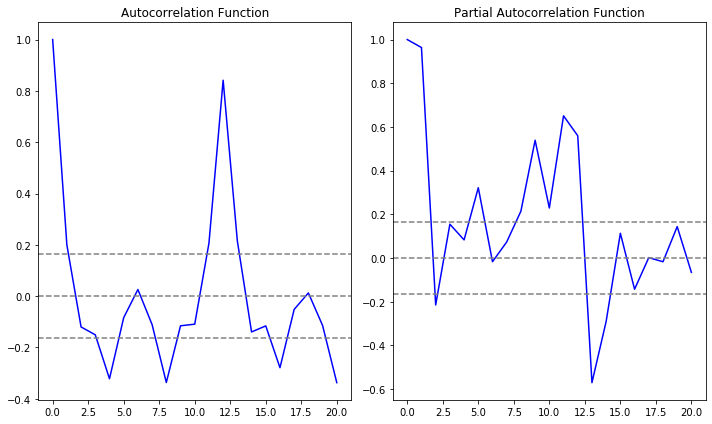

In [81]:
log_acf = acf(logSclaeDiffShift, nlags= 20)
log_pacf = pacf(log_scale_df, nlags= 20, method= 'ols')


plt.subplot(121)
plt.plot(log_acf, 'b')
plt.axhline(y = 0,linestyle = '--', c = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(logSclaeDiffShift)),linestyle = '--', c = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(logSclaeDiffShift)),linestyle = '--', c= 'grey')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(log_pacf, 'b')
plt.axhline(y = 0,linestyle = '--', c = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(logSclaeDiffShift)),linestyle = '--', c = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(logSclaeDiffShift)),linestyle = '--', c= 'grey')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

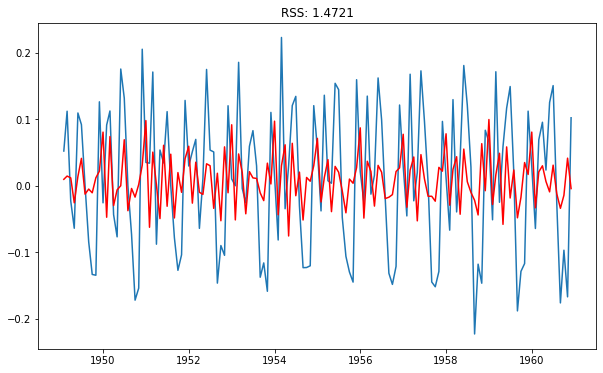

In [100]:
from statsmodels.tsa.arima_model import ARIMA

# AR model

model = ARIMA(log_scale_df, order=(0,1,2))
result_ar = model.fit(disp= -1)

plt.plot(logSclaeDiffShift)
plt.plot(result_ar.fittedvalues, c= 'r')
plt.title('RSS: %.4f'% sum((result_ar.fittedvalues - logSclaeDiffShift['#Passengers'])**2))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

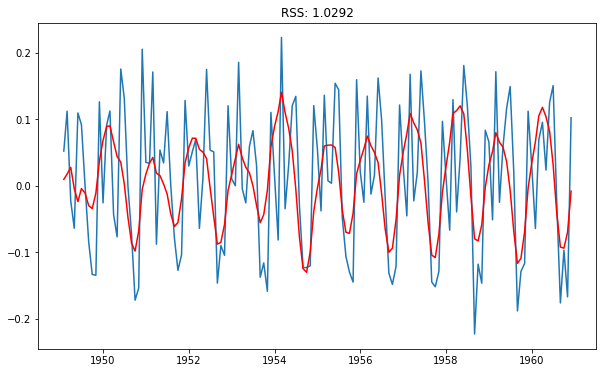

In [143]:
from statsmodels.tsa.arima_model import ARIMA

# MA model

model = ARIMA(log_scale_df, order=(2,1,2))
result_ma = model.fit(disp= -1)

plt.plot(logSclaeDiffShift)
plt.plot(result_ma.fittedvalues, c= 'r')
plt.title('RSS: %.4f'% sum((result_ma.fittedvalues - logSclaeDiffShift['#Passengers'])**2))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.1596')

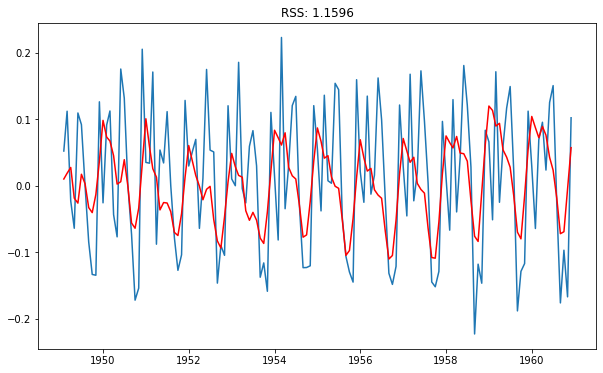

In [153]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA model

model = ARIMA(log_scale_df, order=(3,1,1))
result_arima = model.fit(disp= -1)

plt.plot(logSclaeDiffShift)
plt.plot(result_arima.fittedvalues, c= 'r')
plt.title('RSS: %.4f'% sum((result_arima.fittedvalues - logSclaeDiffShift['#Passengers'])**2))

In [154]:
prediction_arima_diff = pd.Series(result_arima.fittedvalues, copy = True)
prediction_arima_diff.head()

Month
1949-02-01    0.010088
1949-03-01    0.018768
1949-04-01    0.027430
1949-05-01   -0.018716
1949-06-01   -0.026183
dtype: float64

In [155]:
# make it cumsum
prediction_arima_diff_cumsum = prediction_arima_diff.cumsum()
prediction_arima_diff_cumsum.head()

Month
1949-02-01    0.010088
1949-03-01    0.028856
1949-04-01    0.056286
1949-05-01    0.037570
1949-06-01    0.011387
dtype: float64

In [156]:
arima_prediction_log = pd.Series(log_scale_df['#Passengers'], index = log_scale_df.index)
arima_prediction_log = arima_prediction_log.add(prediction_arima_diff_cumsum, fill_value = 0)
arima_prediction_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780773
1949-03-01    4.911658
1949-04-01    4.916098
1949-05-01    4.833360
dtype: float64

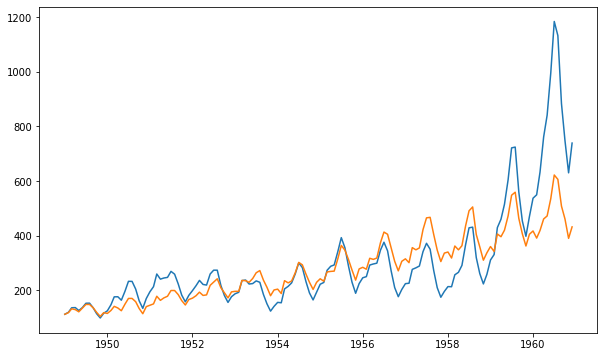

In [157]:
arima_prediction = np.exp(arima_prediction_log)
plt.plot(arima_prediction)
plt.plot(df)

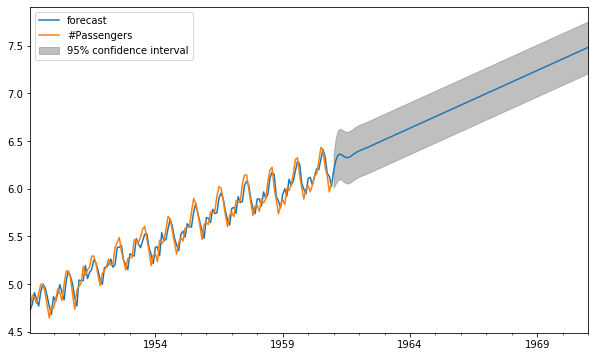

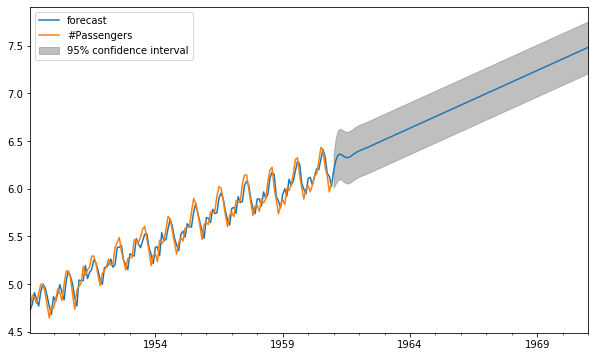

In [166]:
result_arima.plot_predict(1,264)

In [173]:
x = result_arima.forecast(steps = 120)

(array([6.18629685, 6.2921908 , 6.35036   , 6.36495062, 6.35375814,
        6.33665044, 6.32671367, 6.32837481, 6.33961149, 6.3556492 ,
        6.37203547, 6.38619986, 6.39758663, 6.40695566, 6.4154958 ,
        6.42417525, 6.43347057, 6.44340667, 6.45375171, 6.46422216,
        6.47461478, 6.48484815, 6.49493872, 6.50495018, 6.51494771,
        6.52497231, 6.53503606, 6.54513057, 6.55523946, 6.56534826,
        6.57544909, 6.58554068, 6.59562588, 6.6057087 , 6.61579225,
        6.62587793, 6.63596572, 6.64605479, 6.65614418, 6.66623327,
        6.67632181, 6.68640989, 6.69649772, 6.70658553, 6.71667344,
        6.72676149, 6.73684963, 6.74693781, 6.75702599, 6.76711413,
        6.77720225, 6.78729035, 6.79737845, 6.80746654, 6.81755464,
        6.82764275, 6.83773087, 6.84781898, 6.85790709, 6.86799521,
        6.87808332, 6.88817143, 6.89825953, 6.90834764, 6.91843575,
        6.92852386, 6.93861198, 6.94870009, 6.9587882 , 6.96887631,
        6.97896442, 6.98905253, 6.99914064, 7.00